In [7]:
from joblib import Parallel, delayed
import os
os.environ['R_HOME'] = '/public/home/liuzj/softwares/anaconda3/envs/hormone_new/lib/R'
import rpy2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import rpy2.ipython.html
rpy2.ipython.html.init_printing()
from jpy_tools.rTools import py2r, r2py, r_inline_plot, rHelp, trl, rSet, rGet, ad2so, so2ad, so2md, rcontext, Trl, r2py_re, py2r_re, RR, FR
from jpy_tools import loadPkl, toPkl
rBase = importr('base')
rUtils = importr('utils')
dplyr = importr('dplyr')
reticulate = importr('reticulate')
R = ro.r
T = Trl()
R("options(browser='firefox', shiny.port=9533, max.print=200)")
%load_ext rpy2.ipython


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

<Figure size 100x100 with 0 Axes>

In [8]:
import scanpy as sc
import muon as mu
import pandas as pd
import numpy as np
import scipy.sparse as ss
from tqdm import tqdm
from loguru import logger
from functools import partial
from typing import List
from jpy_tools import singleCellTools

Global seed set to 0


In [9]:
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import marsilea as ma
import marsilea.plotter as mp
# plt.rcParams['figure.dpi'] = 150
font_dirs = ["/public/home/mowp/test/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
sns.despine(top=True, right=True)
from itertools import product
from functools import reduce
import patchworklib as pw
from jpy_tools.otherTools import pwRecoverSeaborn, pwStack, F, pwShow
pw.show = pwShow
fc_recoverSns = pwRecoverSeaborn()
import seaborn.objects as so
from cycler import cycler
dt_snsStyle = {**sns.axes_style('ticks'), "legend.frameon": False, "axes.spines.top":False, "axes.spines.right":False, "axes.prop_cycle":cycler(color=['grey'])}
so.Plot.config.theme.update(dt_snsStyle)
#from jpy_tools.soExt import Axhline, Axvline, mvLegToAx
plt.set_loglevel('Warning')

<Figure size 640x480 with 0 Axes>

In [10]:
import scanpy as sc
from IPython.display import display

In [11]:
ad = sc.read_h5ad('/public/home/lizw/home2/task/singlecell/singlecell_hormone/20240101/ad_after_sub_1227_v3.h5ad')

In [12]:
iaa_gene_dict ={'CML12':'AT2G41100','CML45':'AT3G29000','CML5':'AT2G43290',
               'ACA1':'AT1G27770','ACA12':'AT3G63380','ACA13':'AT3G22910',
              'IAA1':'AT4G14560','IAA11':'AT4G28640','IAA19':'AT3G15540',
              'IAA2':'AT3G23030','IAA29':'AT4G32280','IAA5':'AT1G15580',
              'IAA9':'AT5G65670'}

In [13]:
iaa_gene_dict2 = dict(zip(iaa_gene_dict.values(),iaa_gene_dict.keys()))

In [14]:
ead = singleCellTools.EnhancedAnndata(ad)

2024-02-13 22:18:30.050 | WARNING  | jpy_tools.singleCellTools:rawLayer:336 - rawLayer will be overwritten by raw and all the related objects will be re-initialized


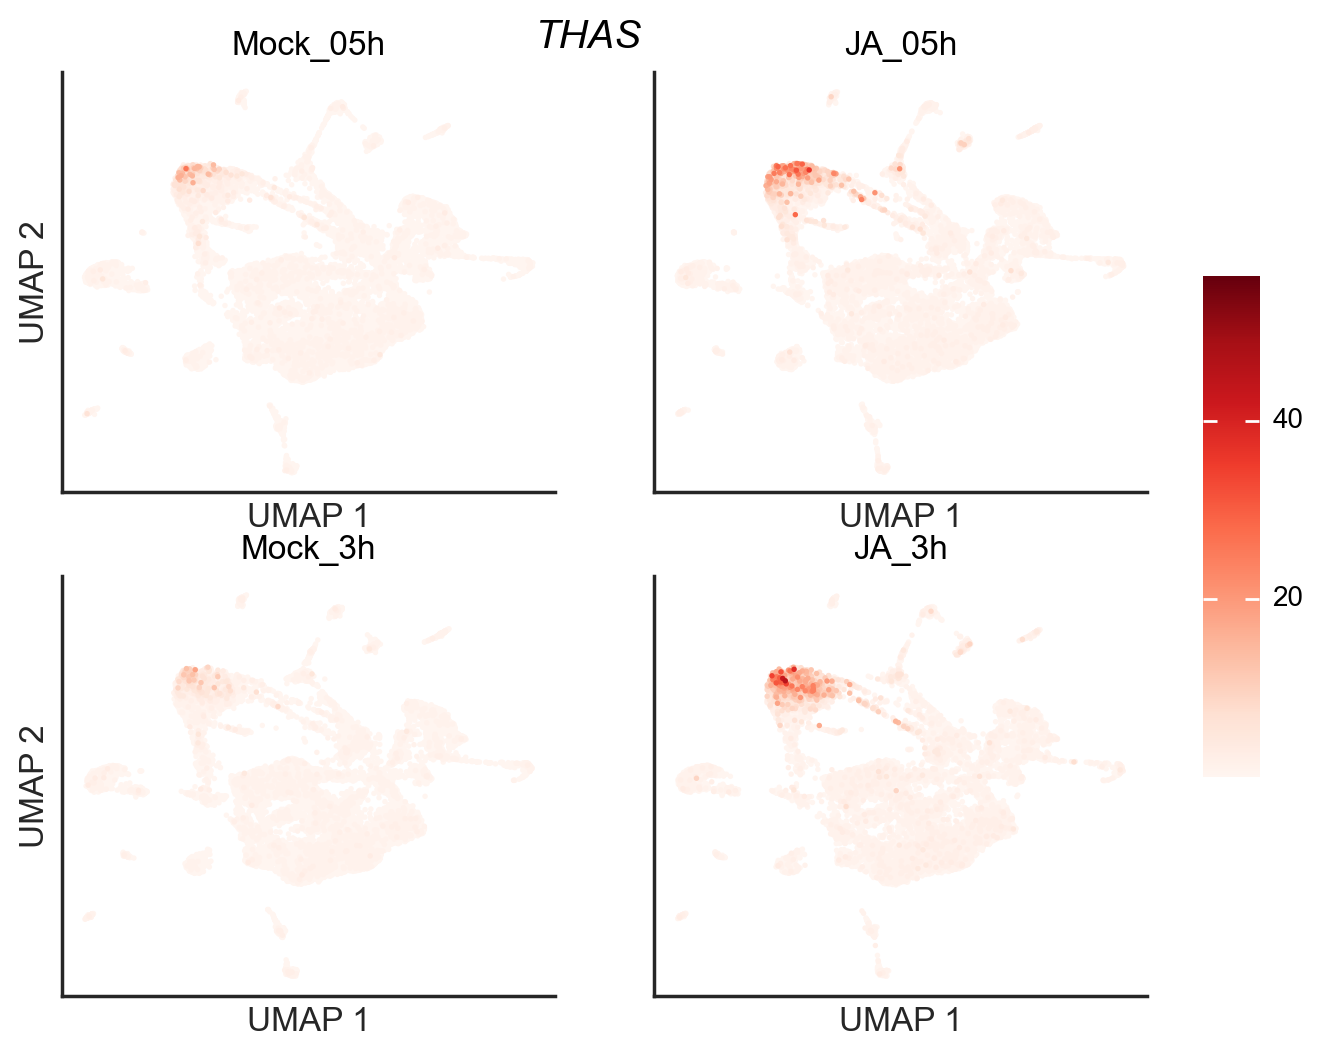

In [21]:
a = ead.pl.embedding(color= 'AT5G48010',size = 1.2,
                 groupby='Sample',
                 wrap=2,
                 addBackground=True,
                 ls_group = ['Mock_05h','JA_05h','Mock_3h','JA_3h'],
                 title='THAS',figsize=(7,6))[1]
display(a)

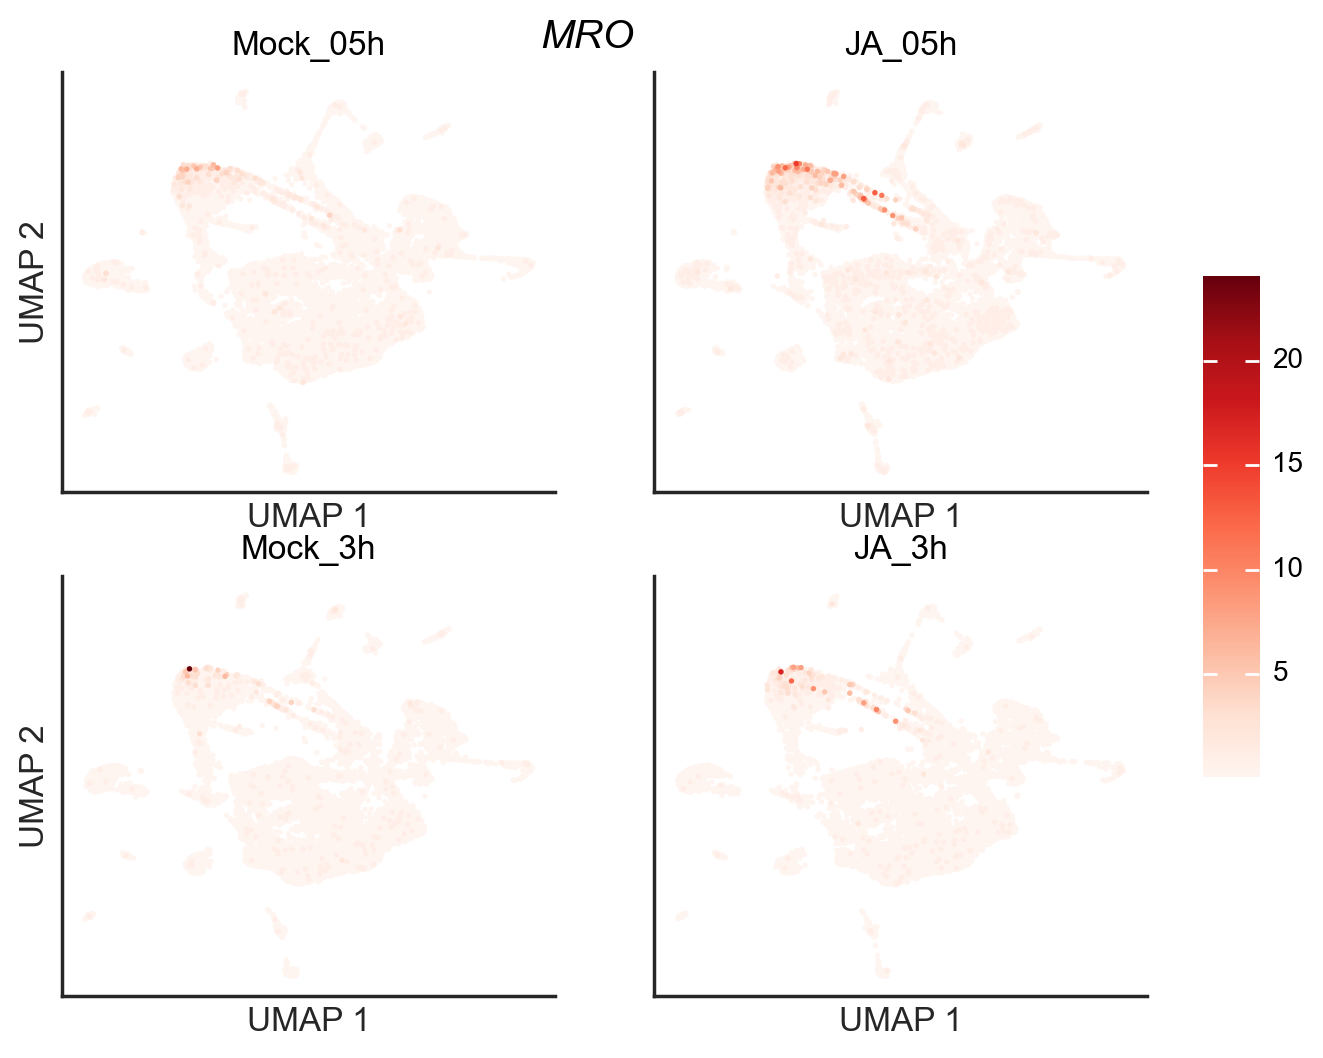

In [22]:
a = ead.pl.embedding(color= 'AT5G42590',size = 1.2,
                 groupby='Sample',
                 wrap=2,
                 addBackground=True,
                 ls_group = ['Mock_05h','JA_05h','Mock_3h','JA_3h'],
                 title='MRO',figsize=(7,6))[1]
display(a)

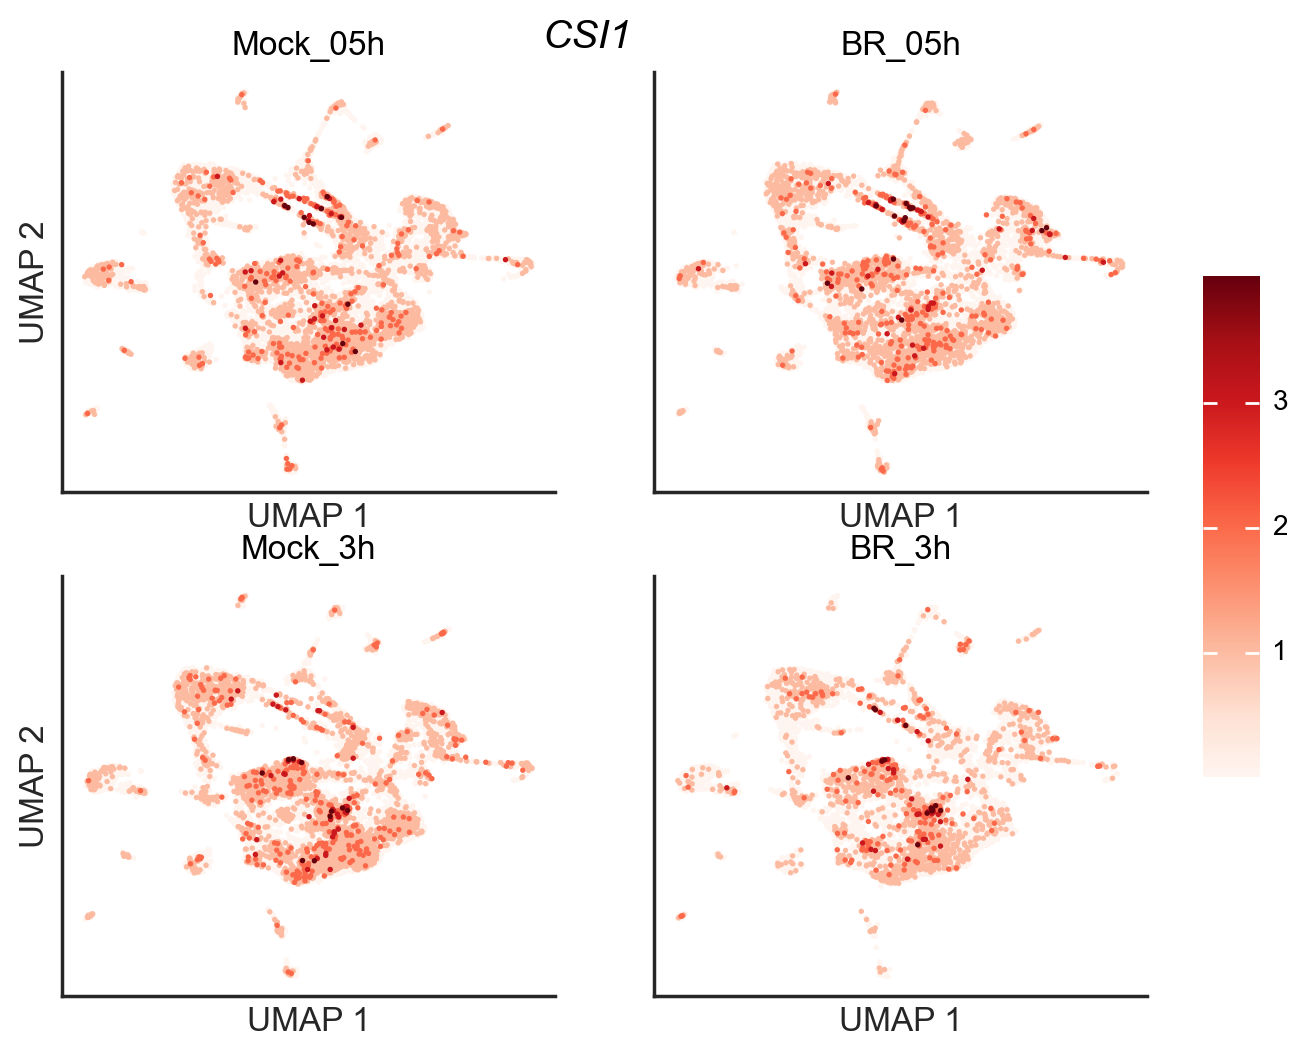

In [19]:
a = ead.pl.embedding(color= 'AT2G22125',size = 1.2,
                 groupby='Sample',
                 wrap=2,
                 vmax=4,
                 addBackground=True,
                 ls_group = ['Mock_05h','BR_05h','Mock_3h','BR_3h'],
                 title='CSI1',figsize=(7,6))[1]
display(a)

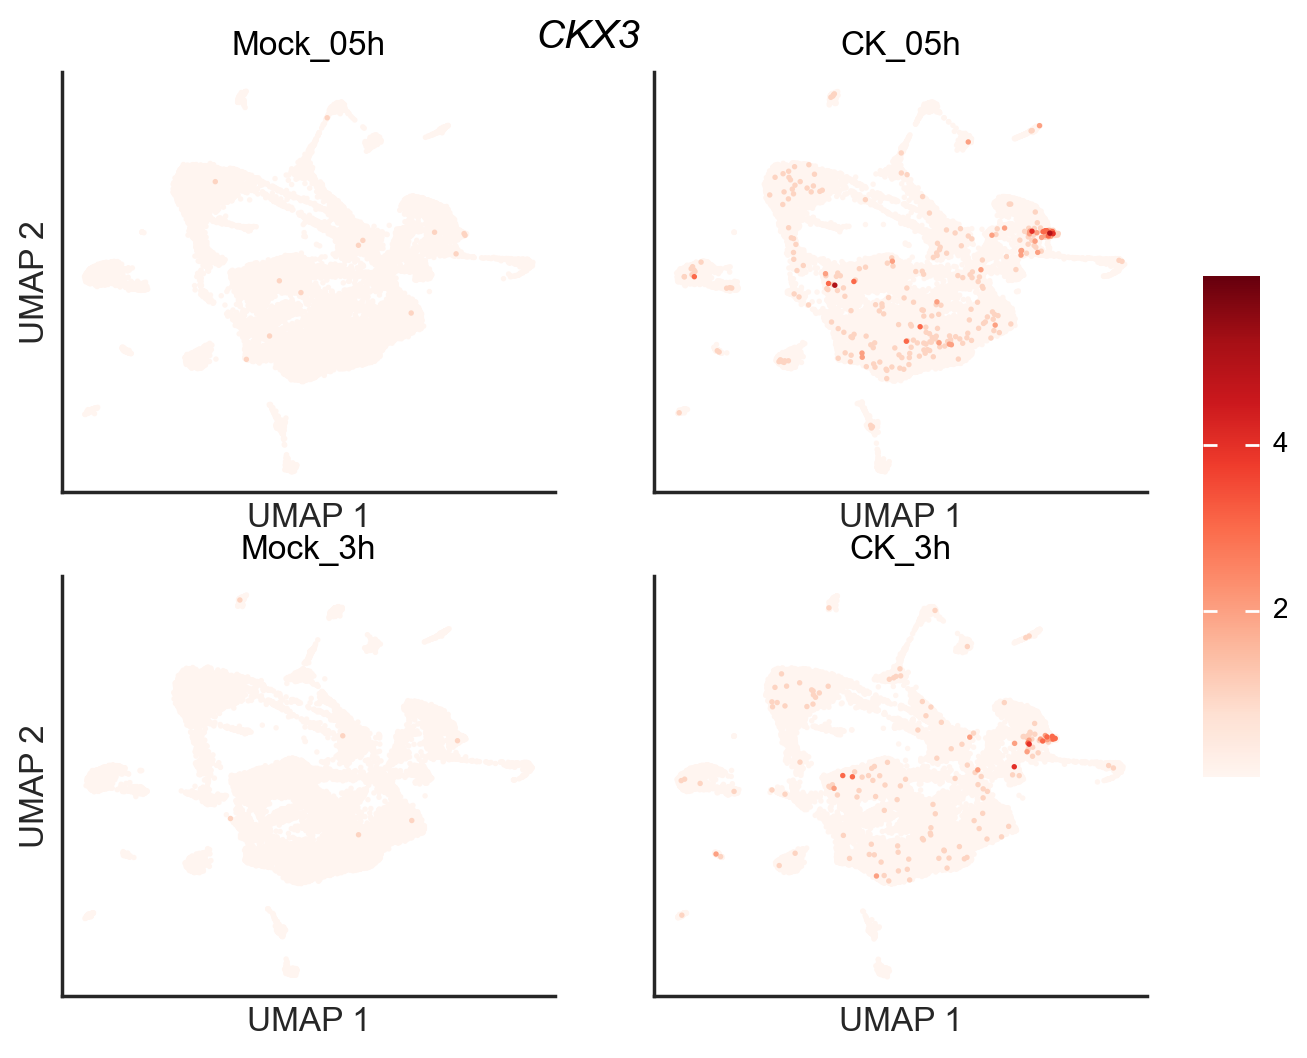

In [13]:
a = ead.pl.embedding(color= 'AT5G56970',size = 1.2,
                 groupby='Sample',
                 wrap=2,
                 addBackground=True,
                 ls_group = ['Mock_05h','CK_05h','Mock_3h','CK_3h'],
                 title='CKX3',figsize=(7,6))[1]
display(a)

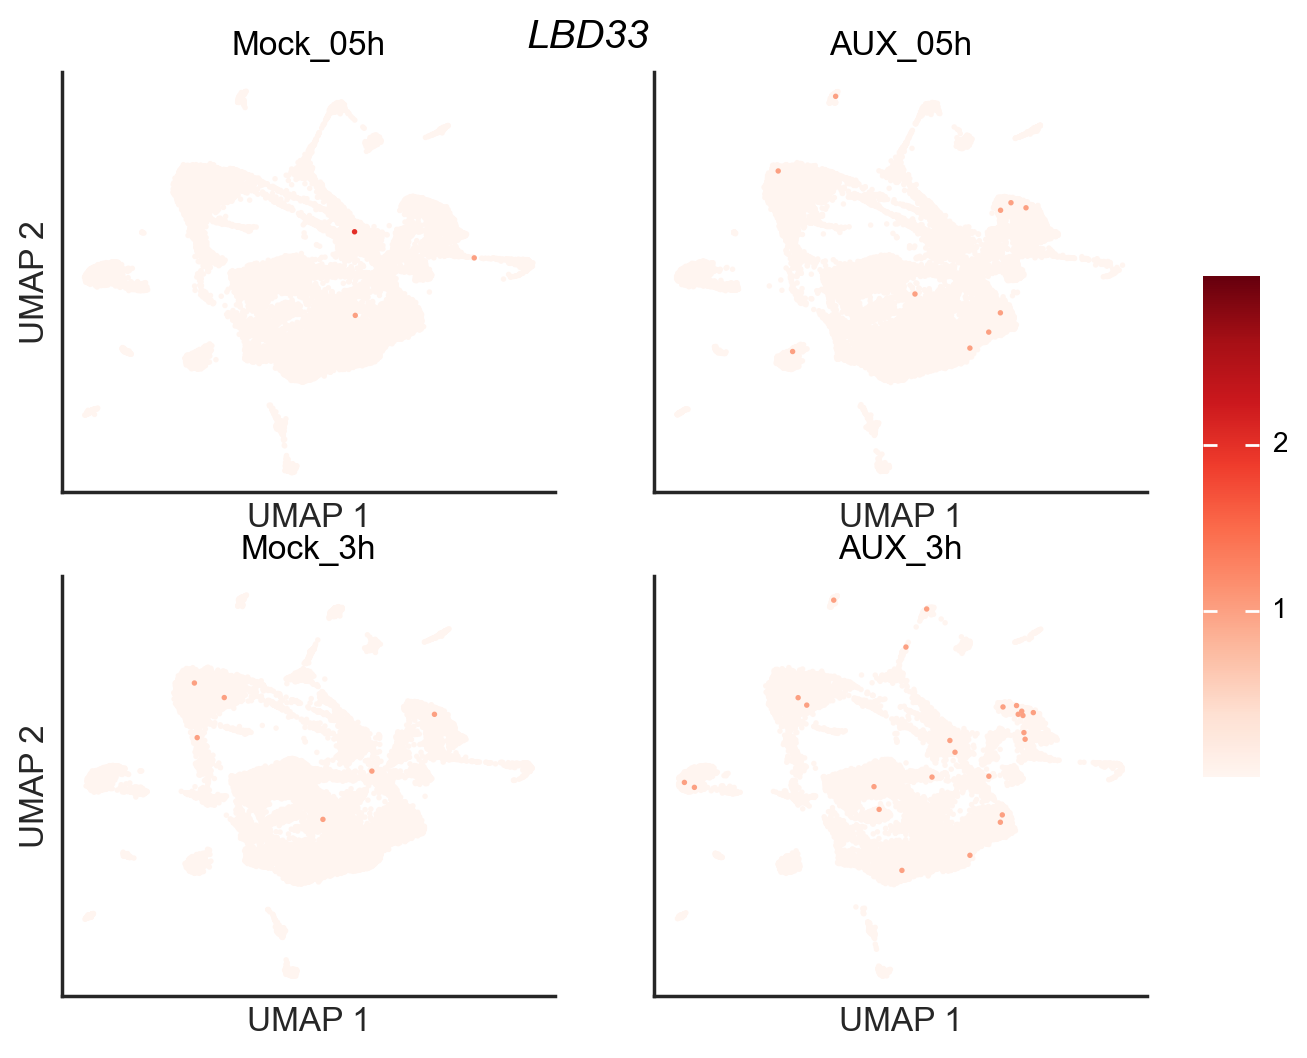

In [14]:
a = ead.pl.embedding(color= 'AT5G06080',size = 1.2,
                 groupby='Sample',
                 wrap=2,
                 addBackground=True,
                 ls_group = ['Mock_05h','AUX_05h','Mock_3h','AUX_3h'],
                 title='LBD33',figsize=(7,6))[1]
display(a)

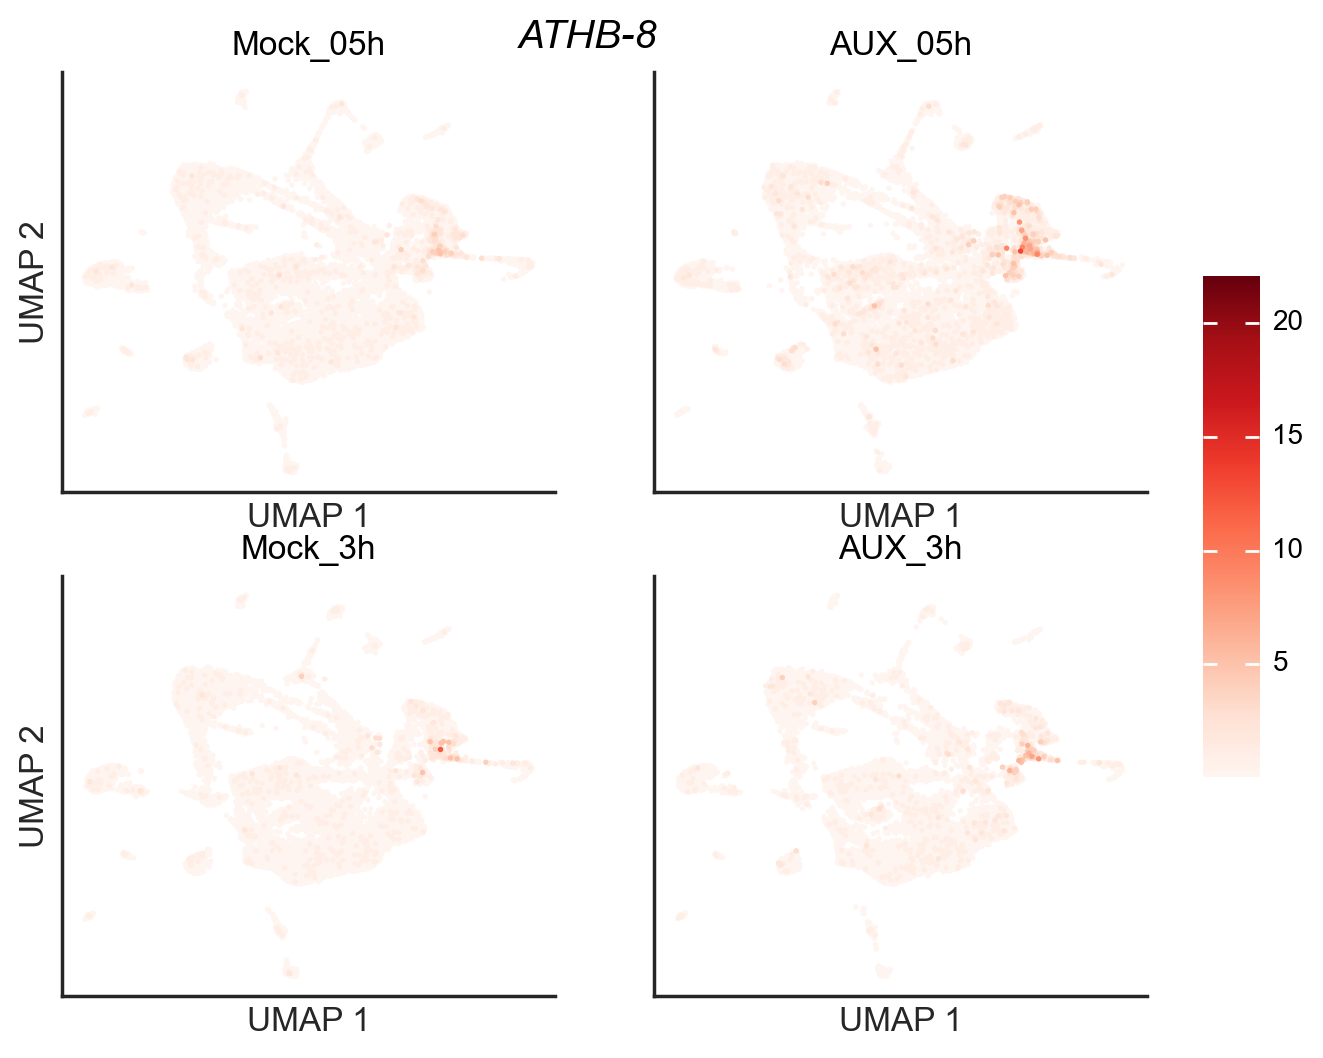

In [15]:
a = ead.pl.embedding(color= 'AT4G32880',size = 1.2,
                 groupby='Sample',
                 wrap=2,
                 addBackground=True,
                 ls_group = ['Mock_05h','AUX_05h','Mock_3h','AUX_3h'],
                 title='ATHB-8',figsize=(7,6))[1]
display(a)

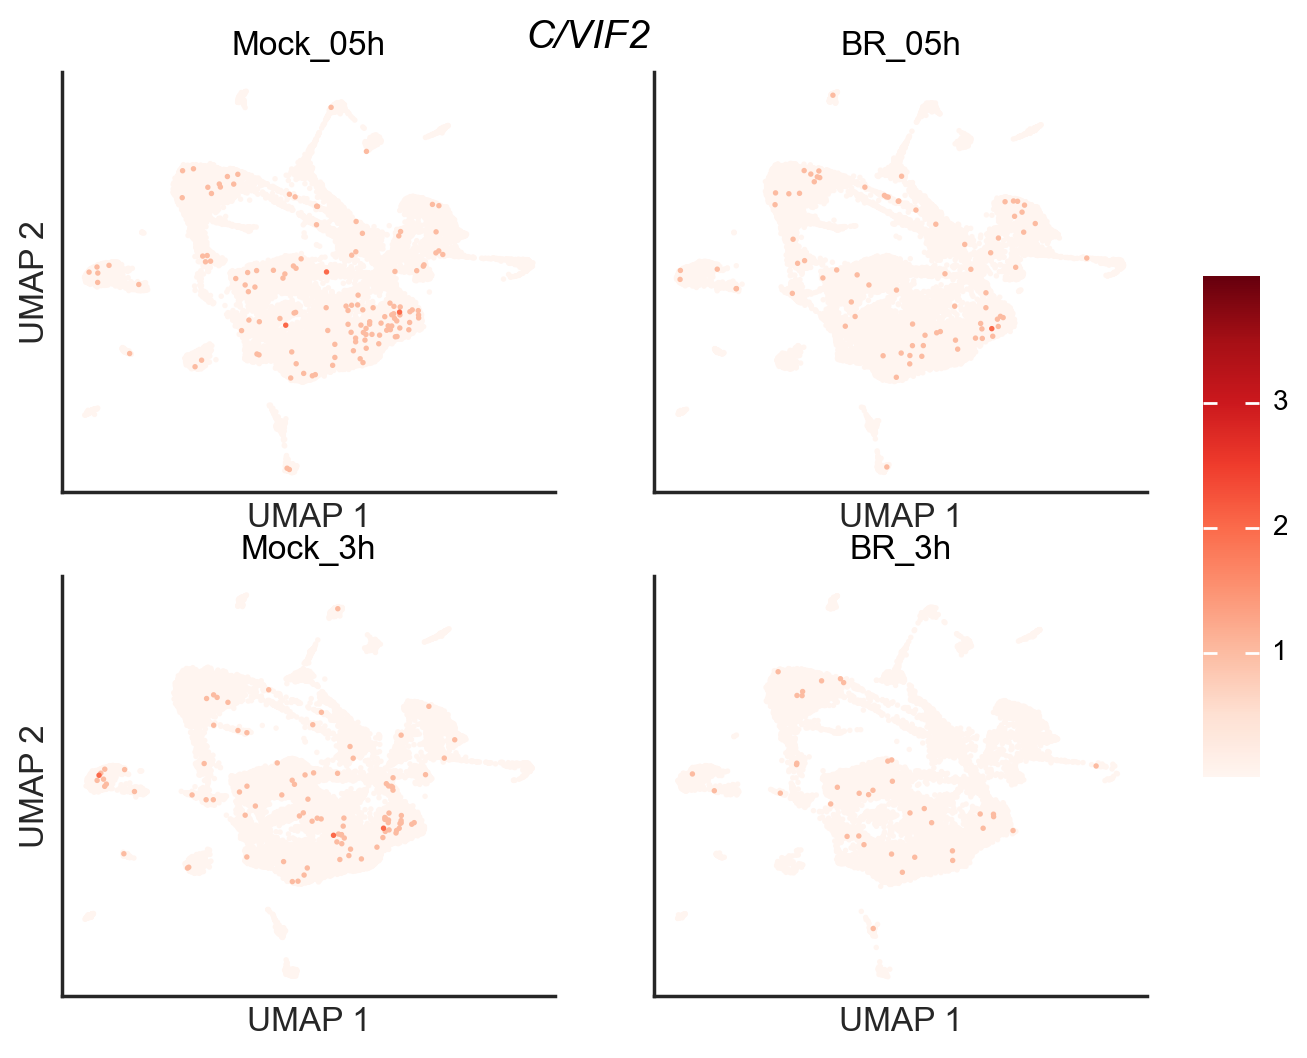

In [12]:
a = ead.pl.embedding(color= 'AT5G64620',size = 1.2,
                 groupby='Sample',
                 wrap=2,
                 addBackground=True,
                 ls_group = ['Mock_05h','BR_05h','Mock_3h','BR_3h'],
                 title='C/VIF2',figsize=(7,6))[1]
display(a)

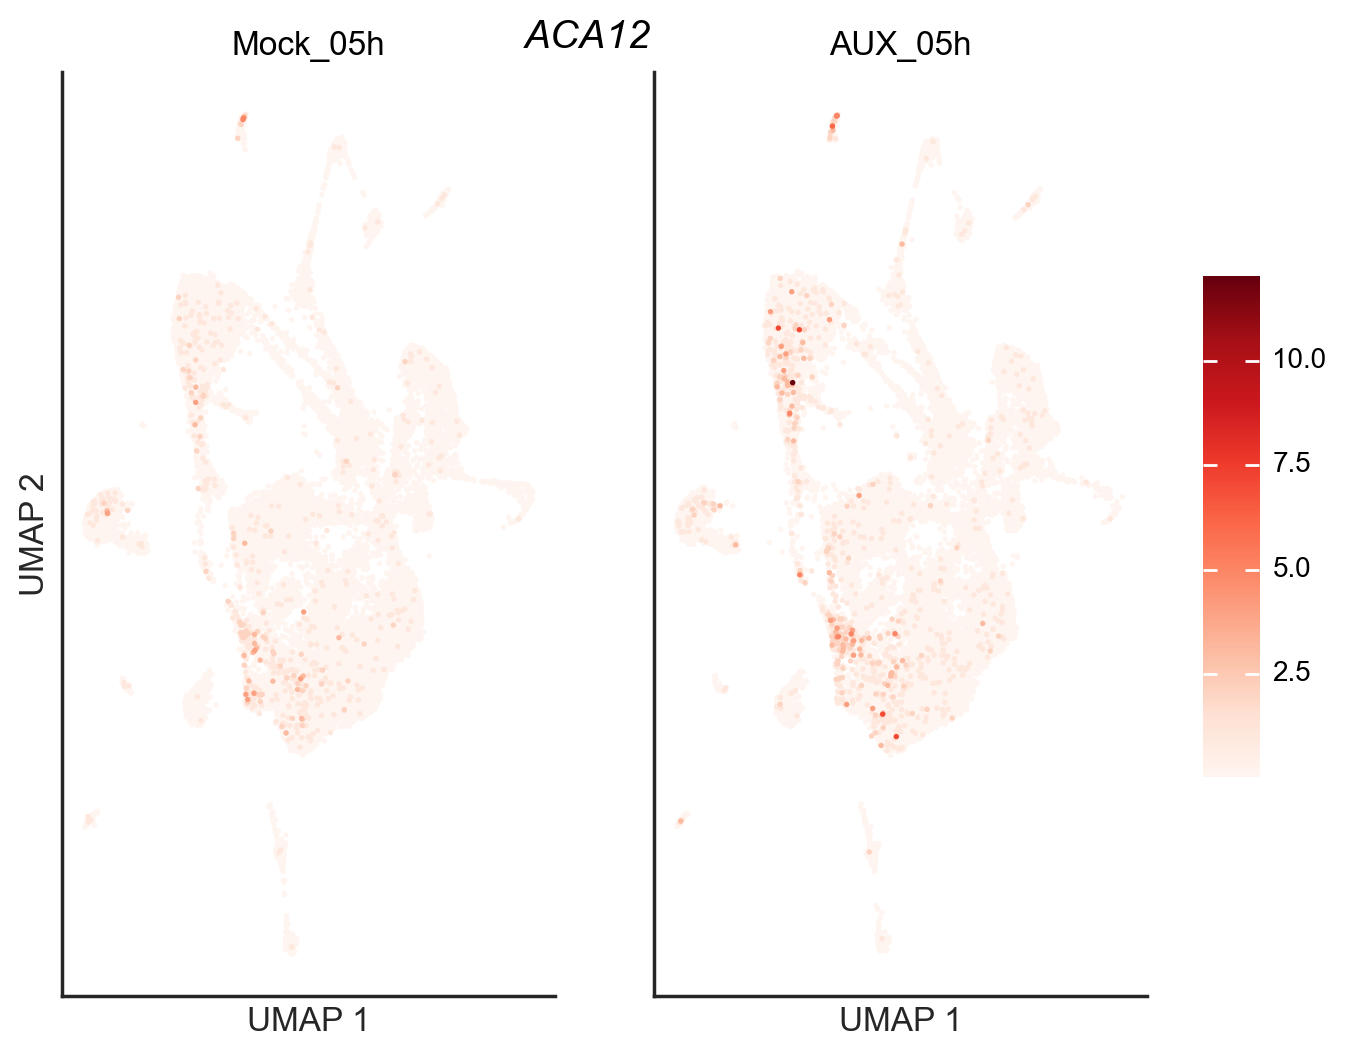

In [75]:
i = 'ACA12'
ead_aux.pl.embedding(color= iaa_gene_dict[i],size = 1.2,
                     groupby='Sample',
                     wrap=2,
                     addBackground=True,
                     ls_group = ['Mock_05h','AUX_05h'],
                     title=i,figsize=(7,6))[1]

In [1]:
import scanpy as sc

In [2]:
cpm_sample = sc.read_h5ad('/public/home/lizw/home2/task/singlecell/singlecell_hormone/20240101/cpm_deg/groupby_sample/All_leiden_mergei_cpm_sample_cluster.h5ad')

In [3]:
cluster_num_order = ['5','2','14','25','28','1','3','4','8','6','17,0','17,1',
                    '0,0','31','32','19','17,2','0,1','16','21','26',
                    '27','11','7','22','33','9','24','10','29',
                    '15','18','20','30','13','12','23']

In [4]:
cluster_order = ['5_Shoot Apical Meristem, Endodermis, Cortex',
 '2_Shoot Epidermal Cell',
 '14_Shoot Epidermal Cell',
 '25_Guard Cell',
 '28_Guard Cell',
 '1_Mesophyll Cell',
 '3_Mesophyll Cell',
 '4_Mesophyll Cell',
 '8_Mesophyll Cell',
 '6_Root Apical Meristem',
 '17,0_Root Epidermal Cell (Meristem)',
 '17,1_Root Epidermal Cell (Elongation)',
 '0,0_Atrichoblast (Maturation)',
 '31_Trichoblast (Maturation)',
 '32_Root Cap',
 '19_Root Cortex And Endodermis (Meristem)',
 '17,2_Root Cortex (Elongation)',
 '0,1_Root Cortex (Maturation)',
 '16_Root  Endodermis  (Suberization) (Elongation)',
 '21_Root Endodermis  (Suberization) (Maturation)',
 '26_Root Endodermis  (Suberization) (Maturation)',
 '27_Root Endodermis (Casparian Strip) (Maturation)',
 '11_Phleom Pole Pericycle',
 '7_Xylem Pole Pericycle',
 '22_Procambium and Immature Phleom',
 '33_Phleom (Sieve Element)',
 '9_Phleom (Companion cell)',
 '24_Phleom (Companion cell)',
 '10_Procambium and Immature Xylem',
 '29_Xylem',
 '15_Proliferating Cell (G1 and S Phase)',
 '18_Proliferating Cell (G2 Phase)',
 '20_Proliferating Cell (M Phase)',]

In [16]:
index_list = [f'{x}.{y}' for y in cluster_order for x in ['Mock_05h','AUX_05h'] ]

In [17]:
cpm_sample_05haux = cpm_sample.to_df().reindex(iaa_gene_dict.values(),axis=1).reindex(index_list)
cpm_sample_05haux_T = cpm_sample_05haux.rename(iaa_gene_dict2,axis=1).T

In [59]:
-np.log10(ad.uns['df_degRes']['fdr'].min())

150.46649793350747

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def gene_list_plot(ad,sample,select_gene_list,label):
    # 假设数据
    select_logfc_dot = ad.uns['df_degRes'].query('(index in @select_gene_list)& (b == @sample)')
    select_logfc_dot['genename'] = select_logfc_dot['index'].map(iaa_gene_dict2)
    df = select_logfc_dot
    df['Cluster'] = df['Cluster'].astype('category')
    df['Cluster'] = df['Cluster'].cat.set_categories(cluster_num_order)
    df['genename'] = df['genename'].astype('category')
    df['genename'] = df['genename'].cat.set_categories(iaa_gene_dict.keys())    
    df = df.sort_values(by=['genename','Cluster'])
    # 计算图表大小 -log10(FDR)
    df['plotSize'] = -np.log10(df['fdr'])

    # 标准化图表大小以便于可视化
    size_norm = (df['plotSize'] / df['plotSize'].max()) * 300 # 调整大小因子

    # 创建图表
    fig, ax = plt.subplots(1,1,figsize=(15,6))

    # 散点图
    scatter = ax.scatter(df['Cluster'], df['genename'], s=size_norm, c=df['logFC'], 
                         cmap='RdBu_r',vmin=-5,vmax=5,)

    # 调整颜色深度图例 (logFC) 的大小和位置
    # 创建颜色条，指定大小和位置
    cbar = fig.colorbar(scatter, ax=ax, 
                        fraction=0.02, 
                        pad=0.01, 
                        aspect=5,
                        anchor=(2.5,0))
    cbar.set_label('logFC')

    # 自定义图例大小 (-log10(FDR))
    fdr_values = [0.000000001, 0.00001,0.01]  # 特定的FDR值
    fdr_sizes = -np.log10(fdr_values)  # 计算大小
    fdr_sizes_norm = (fdr_sizes / df['plotSize'].max() )* 300  # 标准化大小

    # 为每个FDR值生成自定义图例
    sns.set(font_scale=1.2,style='white',rc={'font.weight': 'bold'})
    legend_elements = [plt.scatter([], [], s=size, color='gray', alpha=0.6, label=f'FDR={fdr}') for size, fdr in zip(fdr_sizes_norm, fdr_values)]
    ax.legend(handles=legend_elements, title="FDR Values", bbox_to_anchor=(1.005, 0.65), loc='upper left')
    plt.xlabel('Cluster', weight='bold').set_fontsize('15')
    plt.ylabel('Gene Name',weight='bold').set_fontsize('15')
    plt.xticks(rotation=90)
    plt.title(f'{label} Gene Expression by Cluster', weight='bold').set_fontsize('18')


    color_dict = {'#9ffb9f':['5'],
                 '#30cc30':['2','14'],
                 '#006200':['25','28'],
                 '#7dffd3':['1','3','4','8'],
                 '#f07f7f':['6'],
                 '#a42828':['17,0','17,1','0,0','31'],
                 '#7f007f':['32'],
                 '#da6fd5':['0,1','17,2','19'],
                 '#dc123a':['16','21','26','27'],
                 '#ffa502':['11','7','22','33','9','24','10','29'],
                 '#b48002':['15','18','20'],
                 '#6f7f8f':['30','13','12','23']}
    color_dict_reverse = {x:y for x in cluster_num_order for y in color_dict if x in color_dict[y]}
    for label in ax.get_xticklabels():
        if label.get_text() in color_dict_reverse:
            label.set_color(color_dict_reverse[label.get_text()])


    plt.tight_layout()  # 调整布局以适应图例和颜色条
    plt.show()

In [80]:
iaa_gene_dict ={'CML12':'AT2G41100','CML45':'AT3G29000','CML5':'AT2G43290',
               'ACA1':'AT1G27770','ACA12':'AT3G63380','ACA13':'AT3G22910',
              'IAA1':'AT4G14560','IAA11':'AT4G28640','IAA19':'AT3G15540',
              'IAA2':'AT3G23030','IAA29':'AT4G32280','IAA5':'AT1G15580',
              'IAA9':'AT5G65670'}

In [81]:
select_gene_list = iaa_gene_dict.values()

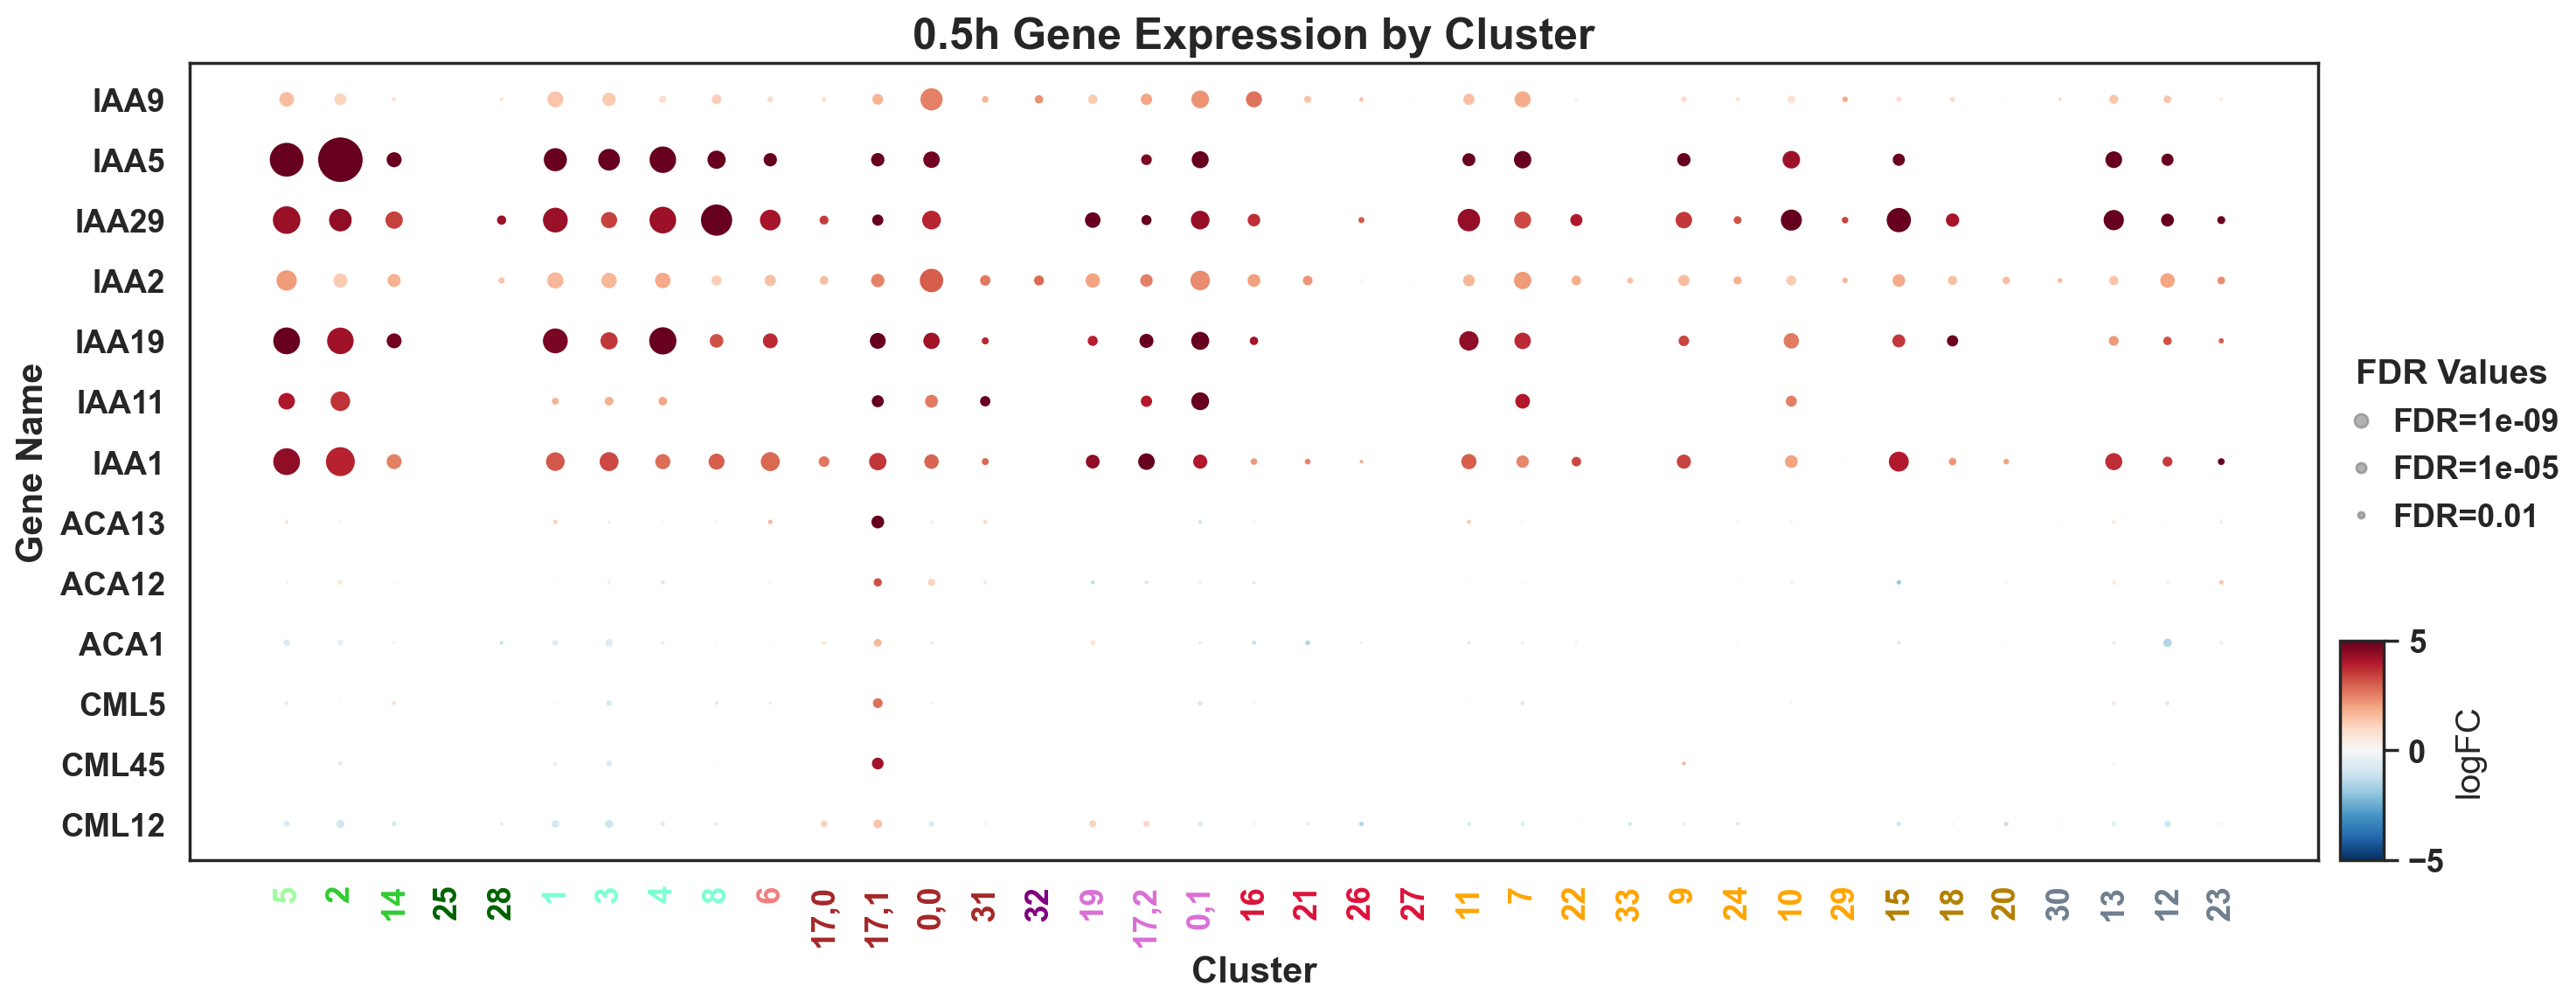

In [82]:
gene_list_plot(ad,'AUX_05h',select_gene_list,'0.5h')

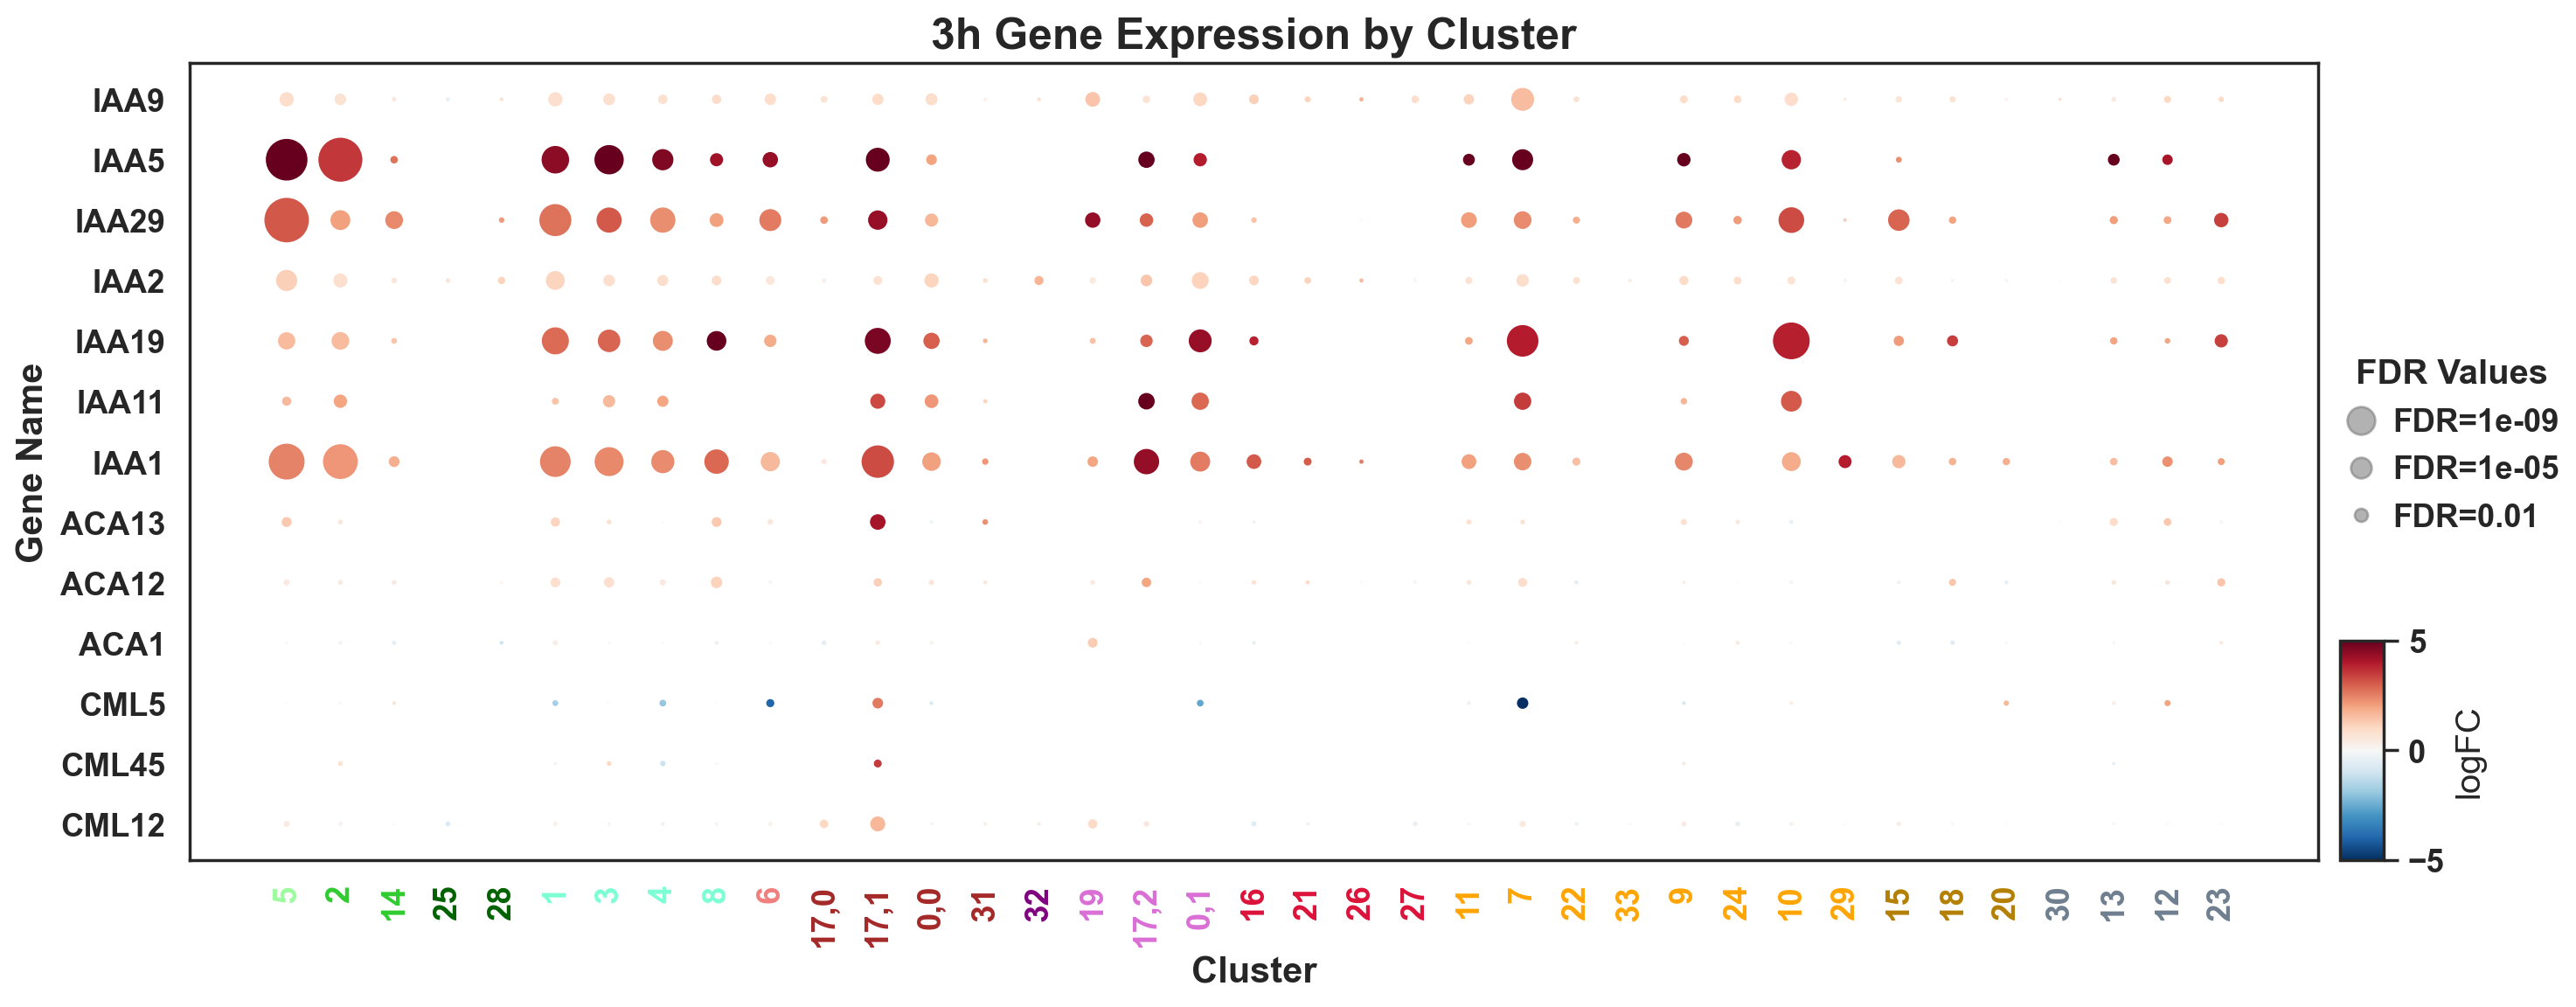

In [83]:
gene_list_plot(ad,'AUX_3h',select_gene_list,'3h')

In [39]:
explore_list =['17,1','17,2']

In [25]:
ad_3h_explorelist = ad.uns['df_degRes'].query('b=="AUX_3h"').query('Cluster in @explore_list')

In [26]:
geneid_name_df = pd.read_csv('/public/home/lizw/home2/task/singlecell/singlecell_hormone/REF/gene_ID_name_v3.csv')

In [27]:
geneid_name_dict = dict(zip(geneid_name_df['GeneID'],geneid_name_df['GeneID_name']))

In [28]:
ad_3h_explorelist['genename'] = ad_3h_explorelist['index'].map(geneid_name_dict )

In [29]:
select_gene_list 

dict_values(['AT2G41100', 'AT3G29000', 'AT2G43290', 'AT1G27770', 'AT3G63380', 'AT3G22910', 'AT4G14560', 'AT4G28640', 'AT3G15540', 'AT3G23030', 'AT4G32280', 'AT1G15580', 'AT5G65670'])

In [30]:
ad_3h_explorelist.query('index in @select_gene_list')

,index,logFC,logCPM,LR,PValue,fdr,a,b,Cluster,Time,genename
3384178,AT1G15580,7.332912,6.714823,33.280737,7.976888e-09,4.309798e-06,Mock_3h,AUX_3h,"17,1",3h,IAA5
3384349,AT1G27770,0.484640,7.260279,0.497763,4.804848e-01,9.004923e-01,Mock_3h,AUX_3h,"17,1",3h,ACA1
3385366,AT2G41100,1.651411,9.564168,13.742913,2.096102e-04,1.468048e-02,Mock_3h,AUX_3h,"17,1",3h,CML12
3385399,AT2G43290,2.598020,6.904035,6.830536,8.961239e-03,1.613876e-01,Mock_3h,AUX_3h,"17,1",3h,CML5
3385716,AT3G15540,4.758158,7.040271,39.787871,2.830977e-10,3.448820e-07,Mock_3h,AUX_3h,"17,1",3h,IAA19
3385830,AT3G22910,4.144367,6.796584,14.771029,1.213861e-04,9.564216e-03,Mock_3h,AUX_3h,"17,1",3h,ACA13
3385833,AT3G23030,0.809154,9.508992,4.461458,3.466790e-02,3.351244e-01,Mock_3h,AUX_3h,"17,1",3h,IAA2
3385930,AT3G29000,3.497512,6.421530,3.480816,6.208412e-02,4.455449e-01,Mock_3h,AUX_3h,"17,1",3h,CML45
3386221,AT3G63380,1.232107,6.911164,3.987244,4.584598e-02,3.867689e-01,Mock_3h,AUX_3h,"17,1",3h,ACA12
3386378,AT4G14560,3.277421,8.856251,60.358250,7.907245e-15,2.990520e-11,Mock_3h,AUX_3h,"17,1",3h,IAA1
